In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [12]:
# initializing df
df = pd.read_excel("../naive_bayes_algorithm/test-data.xlsx")
# Dimensions of df
print(df.shape)
# iloc controls which rows are used.
set_row = df.iloc[0:2]
print(set_row.to_string())


(401, 13)
                Name                Date Venue Result           Squad  Opponent  SoTA  Saves  Save%   CS  PSxG  Opposition XG   GA
0  kasper schmeichel 2021-08-13 23:00:00  Home  W 1–0  Leicester City    Wolves   3.0    3.0  100.0  1.0   0.3            1.1  0.0
1  kasper schmeichel 2021-08-22 23:00:00  Away  L 1–4  Leicester City  West Ham   7.0    3.0   42.9  0.0   3.4            2.5  4.0


In [13]:
# Getting categorical columns
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)
print(f'\n{df[categorical].isnull().sum()}')

# Getting numerical columns
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 5 categorical variables

The categorical variables are :

 ['Name', 'Venue', 'Result', 'Squad', 'Opponent']

Name        1
Venue       1
Result      1
Squad       1
Opponent    1
dtype: int64
There are 8 numerical variables

The numerical variables are :

 ['Date', 'SoTA', 'Saves', 'Save%', 'CS', 'PSxG', 'Opposition XG', 'GA']


In [14]:
# Replacing N/a in save% with 0.0 and dropping date
df = df.fillna(0.0)
df = df.drop(['Date'], axis=1)
# Declare feature vector amd target variable
X = df.drop(['GA'], axis=1)
y = df['GA']

In [15]:
# Spliting Data into sep training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Getting Categorical/numerical columns in training set
print(X_train.dtypes)
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
print(f'Categorical:\n{categorical}')
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print(f'\nNumerical:\n{numerical}')

Name              object
Venue             object
Result            object
Squad             object
Opponent          object
SoTA             float64
Saves            float64
Save%            float64
CS               float64
PSxG             float64
Opposition XG    float64
dtype: object
Categorical:
['Name', 'Venue', 'Result', 'Squad', 'Opponent']

Numerical:
['SoTA', 'Saves', 'Save%', 'CS', 'PSxG', 'Opposition XG']


In [16]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['Name', 'Venue', 'Result', 'Squad', 'Opponent'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


# Feature Scaling
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [17]:
# Training our df
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting results
y_pred = gnb.predict(X_test)
print(y_test.head(5))
print(y_pred)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

16     6.0
222    2.0
313    1.0
207    3.0
282    1.0
Name: GA, dtype: float64
[4. 2. 1. 3. 1. 2. 0. 0. 2. 1. 0. 4. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 3. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 2. 1. 2. 0. 1. 2. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 2. 2. 1. 1. 1. 5. 1. 0. 0. 2. 2. 2. 1. 2. 3. 0. 0. 3. 1.
 0. 1. 2. 0. 4. 2. 0. 0. 1.]
Model accuracy score: 0.9383
[1. 0. 0. 2. 4. 2. 2. 0. 2. 0. 0. 1. 1. 1. 2. 1. 0. 3. 3. 1. 1. 0. 1. 0.
 0. 2. 2. 0. 2. 2. 0. 0. 1. 0. 1. 0. 4. 2. 3. 4. 0. 1. 1. 1. 0. 1. 0. 1.
 2. 0. 1. 2. 0. 0. 0. 0. 4. 0. 2. 1. 3. 1. 3. 2. 4. 2. 1. 3. 2. 0. 2. 1.
 3. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 1. 4. 2. 0. 0. 0. 1. 0.
 1. 0. 1. 2. 1. 2. 1. 3. 0. 1. 0. 0. 0. 1. 1. 0. 0. 2. 2. 1. 0. 0. 1. 0.
 5. 1. 0. 2. 1. 2. 3. 3. 5. 2. 0. 1. 1. 1. 3. 1. 1. 3. 1. 1. 3. 2. 0. 1.
 5. 2. 1. 0. 2. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 3. 0. 1. 4. 0. 0. 2. 2. 1.
 0. 1. 0. 3. 1. 4. 0. 0. 0. 4. 1. 1. 1. 3. 1. 0. 4. 0. 3. 2. 2. 1. 4. 0.
 1. 1. 1. 0. 2. 1. 1. 3. 3. 1. 3. 2. 1. 0. 5. 1. 1. 0. 2. 1

Confusion matrix

 [[26  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0]
 [ 0  0 14  0  0  0  0]
 [ 0  2  0  4  1  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0]]


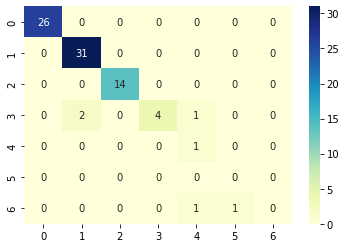

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
cm_matrix = pd.DataFrame(data=cm)
heat = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()